
#Bitcoin price predictor by LinearRegression



###Importing Libraries

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


###Loading the Dataset and formating

In [2]:
url = 'https://api.binance.com/api/v3/klines'



r = requests.get(url,params={'symbol':'BTCUSDT','interval': '1d','limit':2000})
r


<Response [200]>

In [3]:
collumns = """

1499040000000,      // Open time
    "0.01634790",       // Open
    "0.80000000",       // High
    "0.01575800",       // Low
    "0.01577100",       // Close
    "148976.11427815",  // Volume
    1499644799999,      // Close time
    "2434.19055334",    // Quote asset volume
    308,                // Number of trades
    "1756.87402397",    // Taker buy base asset volume
    "28.46694368",      // Taker buy quote asset volume
    "17928899.62484339" // Ignore.

""".split("//")[1:-1]


my_col_names = [sub_str.split('\n')[0].lower().strip().replace(' ','_') for sub_str in collumns]
# my_col_names.insert(0, 'timestamp')
my_col_names.append('ignore')
my_col_names

['open_time',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'close_time',
 'quote_asset_volume',
 'number_of_trades',
 'taker_buy_base_asset_volume',
 'taker_buy_quote_asset_volume',
 'ignore']

In [4]:
df = pd.DataFrame(r.json(),columns = my_col_names)
df.index = pd.to_datetime(df.open_time*1000000)
#df.index = pd.DatetimeIndex(df.open_time*1000000)
df.index.name = 'Date'
#df['Date']=df.index
df = df.drop(columns=['open_time','close_time','ignore','quote_asset_volume','taker_buy_quote_asset_volume', 'taker_buy_base_asset_volume','number_of_trades'])
df.head(5)

,open,high,low,close,volume
Date,,,,,
2019-04-19,5258.44000000,5320.00000000,5175.00000000,5258.68000000,24611.23632300
2019-04-20,5258.68000000,5333.42000000,5230.10000000,5291.73000000,19168.90827400
2019-04-21,5292.91000000,5314.35000000,5165.00000000,5256.14000000,25549.57093900
2019-04-22,5257.41000000,5400.00000000,5208.35000000,5357.14000000,29563.85230900
2019-04-23,5357.14000000,5600.00000000,5332.41000000,5493.31000000,41262.10391700


In [5]:
df["open"] = pd.to_numeric(df["open"])
df["close"] = pd.to_numeric(df["close"])
df['Mean'] = (df['open'] + df['close'])/2
df=df.dropna()
df.head(5)

,open,high,low,close,volume,Mean
Date,,,,,,
2019-04-19,5258.44,5320.00000000,5175.00000000,5258.68,24611.23632300,5258.560
2019-04-20,5258.68,5333.42000000,5230.10000000,5291.73,19168.90827400,5275.205
2019-04-21,5292.91,5314.35000000,5165.00000000,5256.14,25549.57093900,5274.525
2019-04-22,5257.41,5400.00000000,5208.35000000,5357.14,29563.85230900,5307.275
2019-04-23,5357.14,5600.00000000,5332.41000000,5493.31,41262.10391700,5425.225


In [6]:
df['Date']=df.index
df.head(5)

,open,high,low,close,volume,Mean,Date
Date,,,,,,,
2019-04-19,5258.44,5320.00000000,5175.00000000,5258.68,24611.23632300,5258.560,2019-04-19
2019-04-20,5258.68,5333.42000000,5230.10000000,5291.73,19168.90827400,5275.205,2019-04-20
2019-04-21,5292.91,5314.35000000,5165.00000000,5256.14,25549.57093900,5274.525,2019-04-21
2019-04-22,5257.41,5400.00000000,5208.35000000,5357.14,29563.85230900,5307.275,2019-04-22
2019-04-23,5357.14,5600.00000000,5332.41000000,5493.31,41262.10391700,5425.225,2019-04-23


In [7]:
required_colmn = ['low', 'high', 'open',  'volume','Mean']
output_label = 'close'

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(
df[required_colmn],
df[output_label],
test_size = 0.3
)

In [9]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [10]:
model.score(X_test, Y_test)

1.0

In [11]:
future_set = df.shift(20).tail(30)

In [12]:
prediction = model.predict(future_set[required_colmn])

Text(0, 0.5, '$ Price')

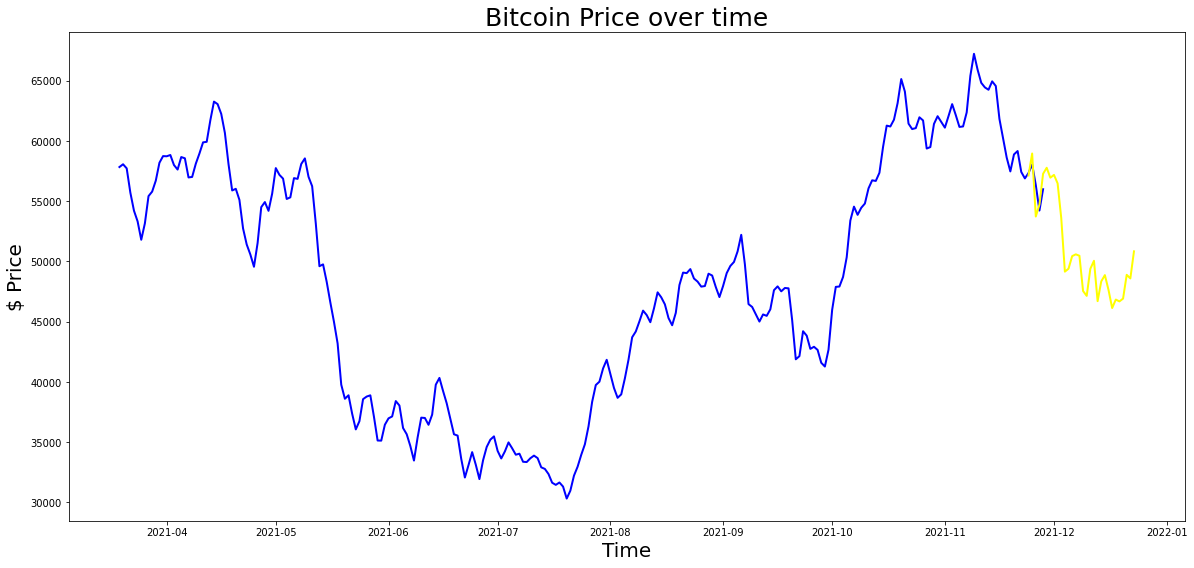

In [14]:
plt.figure(figsize = (20, 9))
plt.plot(df["Date"][-300:-45], df["Mean"][-300:-45], color='blue', lw=2)
plt.plot(future_set["Date"], prediction, color='yellow', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)